<a id='top'></a>
# Big Data Analytics A.A. 2020/21 1st Mid Term: Data Understanding and Project Formulation 
## Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
#### Malucs : Luca Corbucci 516450, Cinzia Lestini 219809, Marco Giuseppe Marino 596673 and Simone Rossi 507267

Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?

In this notebook we will use the dataset created with the survey respondes of the "National 2009 H1N1 Flu Survey" to understand how likely individuals are to receive their H1N1 and seasonal flu vaccines.
During this phone survey respondents were asked whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves.

Understand how likely individuals are to receive the vaccine could be interesting also during the Covid-19 pandemic that we are currently fighting and for which we do not already have a vaccine.

The dataset used in this notebook is taken from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

## Table of Contents
1. [Dataset Description](#dataset)
2. [Data Cleaning](#dc)
    1. [Missing Values](#mv)
    2. [Data Consistency](#cost)
    3. [Transformation of Categorical variables](#tcv)
3. [Exploration](#ex)
    1. [Distributions and Plots](#dp)
        1. [General](#g1)
        2. [H1N1](#h1)
        3. [Seasonal flu](#s1)
    2. [Outliers](#out)
    3. [Correlations](#cor)
        1. [General](#g2)
        2. [H1N1](#h2)
        3. [Seasonal flu](#s2)
4. [Data Transformation](#tr)
    1. [Variables Elimination](#ve)
    2. [Variables Creation](#vc)
    3. [Splitting of the dataset](#split)
        1. [H1N1](#h3)
        2. [Seasonal flu](#s3)

In [1]:
# packages import
%matplotlib inline
import pandas as pd
import numpy as np
#import of a set of supporting functions
from Utils.Utils import Utils
import warnings
warnings.filterwarnings("ignore")

<a id='dataset'></a>
## 1. Dataset description ([to top](#top))

In this phase we proceed to load our dataset in a DataFrame and then we show some basic characteristic of it.

In [2]:
#load of the training set .csv file
vaccines=pd.read_csv("./Data/training_set_features.csv")
#load of the training labels .csv file
labels=pd.read_csv("./Data/training_set_labels.csv")

Let's check if the feture 'respondent_id' is in the same order in both vaccines and labels.

In [3]:
dif=vaccines['respondent_id']-labels['respondent_id']
tot=dif.value_counts()
tot

0    26707
Name: respondent_id, dtype: int64

We can join the two DataFrames on 'respondent_id' and than print some rows of the final DataFrame. 

In [4]:
pd.set_option('display.max_columns', None)
vaccines=vaccines.join(labels.set_index('respondent_id'),on='respondent_id')
vaccines.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


Let's print the number of rows and colums of the vaccines DataFrame.

In [5]:
vaccines.shape

(26707, 38)

We provide a short description of the 38 features in this dataset:
- respondent_id: unique random identifier of respondent.
- h1n1_concern: Level of concern about the H1N1 flu. 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledg: Level of knowledge about H1N1 flu. 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds: Has taken antiviral medications. (binary)
- behavioral_avoidance: Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask: Has bought a face mask. (binary)
- behavioral_wash_hands: Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings: Has reduced time at large gatherings. (binary)
- behavioral_outside_home: Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face: Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1: H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal: Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition: Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months: Has regular close contact with a child under the age of six months. (binary)
- health_worker: Is a healthcare worker. (binary)
- health_insurance: Has health insurance. (binary)
- opinion_h1n1_vacc_effective: Respondent's opinion about H1N1 vaccine effectiveness. 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk: Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc: Respondent's worry of getting sick from taking H1N1 vaccine. 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective: Respondent's opinion about seasonal flu vaccine effectiveness. 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk: Respondent's opinion about risk of getting sick with seasonal flu without vaccine. 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc: Respondent's worry of getting sick from taking seasonal flu vaccine. 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group: Age group of respondent.
- education: Self-reported education level.
- race: Race of respondent.
- sex: Sex of respondent.
- income_poverty: Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status: Marital status of respondent.
- rent_or_own: Housing situation of respondent.
- employment_status: Employment status of respondent.
- hhs_geo_region: Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa: Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults: Number of other adults in household, top-coded to 3.
- household_children: Number of children in household, top-coded to 3.
- employment_industry: Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation: Type of occupation of respondent. Values are represented as short random character strings.
- h1n1_vaccine: respondent got vaccinated against h1n1.
- seasonal_vaccine: respondent got vaccinated against seasonal flu. 

We can print also some basic information about all the columns in vaccines.

In [6]:
#dataset info
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Target description

In this dataset we have two target variables:
- h1n1_vaccine: Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine: Whether respondent received seasonal flu vaccine.

The value for both target variable is 0 if the respondent did not received the vaccine and 1 if the respondent received the vaccine.

As you can see from the following plot, the h1n1_vaccine vaccine target is not balanced because we have 21033 respondent who did not received the vaccine and only 5674 that received the vaccine. 
On the contrary the seasonal_vaccine target variable is almost balanced because we have 14272 respondant who did not received the vaccine and 12435 who received the vaccine.
We will deal with the problem of non-balancing of the class h1n1_vaccine during the classification phase.

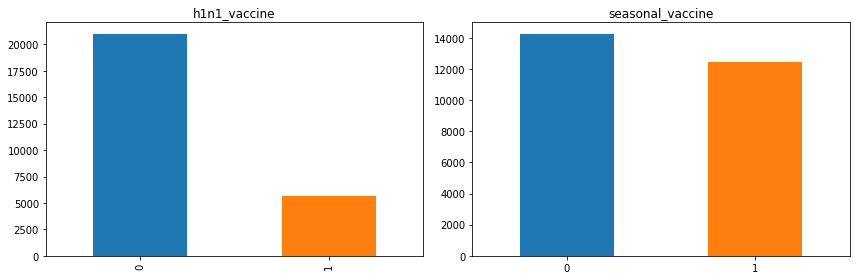

In [7]:
Utils.plotComparisonBar(vaccines, ['h1n1_vaccine', 'seasonal_vaccine'])

<a id='dc'></a>
## 2. Data Cleaning ([to top](#top))



We have to clean our dataset to make it suitable to a complete analysis. We will deal with missing values, strange values and categorical variables.

<a id='mv'></a>
### 2A. Missing Values ([to top](#top))

Once we figured out which columns contain missing values we can apply different techniques to solve them.

We use the following functions to show which columns have missing values and how many of them. 

In [8]:
# checking for all columns if they contain any missing values
vaccines.isnull().any()

respondent_id                  False
h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
m

In [9]:
#number of missing values for every feature
vaccines.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

For all features with a small number of missing values we will replace every null with the mode.

In [10]:
#features on which we apply the mode
cols_to_mode = [
    'h1n1_concern',
    'h1n1_knowledge',
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'child_under_6_months',
    'health_worker',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'education',
    'marital_status',
    'household_adults',
    'household_children'
]

#This function replace all the missing values in the columns in cols_to_mode with the mode
Utils.dfMode(cols_to_mode, vaccines)

We guessed that "employment_status" could be somehow related with "education", "income_poverty" with "employment_status" and "rent_or_own" with "employment_status". 

To fill the missing values in the "employment_status" column we group the 'education' column by values and then we compute the mode of the group. 
The mode of this group is then used to fill the corresponging values in the 'employment_status' column.

We did the same for "income_poverty" and "rent_or_own".

In [11]:
vaccines.loc[:, 'employment_status'] =  vaccines.groupby('education').employment_status.transform(lambda x: x.fillna(x.mode()[0]))
vaccines.loc[:, 'income_poverty'] =  vaccines.groupby(['employment_status']).income_poverty.transform(lambda x: x.fillna(x.mode()[0]))
vaccines.loc[:, 'rent_or_own'] =  vaccines.groupby(['income_poverty']).rent_or_own.transform(lambda x: x.fillna(x.mode()[0]))

We decided to simply drop columns with too many missing values. 

In [12]:
cols_to_drop = [
    'health_insurance',
    'employment_industry',
    'employment_occupation'
]
vaccines.drop(cols_to_drop, axis=1, inplace = True)

We tried to handle the missing values in the columns employment_industry and employment_occupation but we found too many missing values. We tried to fill the missing values considering the relations between these two features with the others in the dataset.
In the end we noticed that both features were highly correlated with employment_status and so we decided to drop them because of the presence of a high number of missing values.

In [13]:
#number of missing values for every feature
vaccines.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [14]:
vaccines.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In our dataset we have a lot of float variables. After understanding the meaning of the features we conclude that we could convert the type of all of them to int.

In [15]:
for features in vaccines.columns:
    if(vaccines[features].dtypes == 'float64'):
        vaccines[features] = vaccines[features].astype(int)

<a id='cost'></a>
### 2B. Data Consistency ([to top](#top))
We have to check if our features are consistent with their description and they don't hide strange values that might be hidden missing values. 

Let's check if there are repeated rows in the dataset.

In [16]:
vaccines_count = vaccines.shape[0]
vaccines_dup = vaccines.drop_duplicates().shape[0]
c=vaccines_count-vaccines_dup
print('Number of repeated rows :', c)

Number of repeated rows : 0


In [17]:
#List of the DataFrame features
features_list=vaccines.columns.tolist()
#We don't need respondent_id in the list
features_list.remove('respondent_id')

In [18]:
#This function prints all the possible values for all the columns in features_list
Utils.printValues(features_list, vaccines)

2    10667
1     8153
3     4591
0     3296
Name: h1n1_concern, dtype: int64

1    14714
2     9487
0     2506
Name: h1n1_knowledge, dtype: int64

0    25406
1     1301
Name: behavioral_antiviral_meds, dtype: int64

1    19436
0     7271
Name: behavioral_avoidance, dtype: int64

0    24866
1     1841
Name: behavioral_face_mask, dtype: int64

1    22057
0     4650
Name: behavioral_wash_hands, dtype: int64

0    17160
1     9547
Name: behavioral_large_gatherings, dtype: int64

0    17726
1     8981
Name: behavioral_outside_home, dtype: int64

1    18129
0     8578
Name: behavioral_touch_face, dtype: int64

0    21299
1     5408
Name: doctor_recc_h1n1, dtype: int64

0    18613
1     8094
Name: doctor_recc_seasonal, dtype: int64

0    19417
1     7290
Name: chronic_med_condition, dtype: int64

0    24569
1     2138
Name: child_under_6_months, dtype: int64

0    23808
1     2899
Name: health_worker, dtype: int64

4    12074
5     7166
3     4723
2     1858
1      886
Name: opinion_h1n1_vacc

From this analysis we can conclude that in our dataset we don't have any outliers.

We also checked that the values that we have in the columns are the ones described on Driven Data.

We guessed that during the survey from which the dataset was created the users had to choose only some pre defined values to answer the questions.

Considering that all the features have binary values or values included in a limited range, we did not produce any boxplot.

<a id='tcv'></a>
### 2C. Transformation of Categorical variables ([to top](#top))

Some of the variables of our dataset are categorical, among them some are ordinal variables (Example: age_group).
Before starting the exploration of our dataset we decided to transform all the possible values of the categorical features in numerical values.

In [19]:
# Store the original dataset in another variable to use it for the plots.
vaccines_plot = vaccines.copy()

In [20]:
#The function encodeValues encodes categorical features that are not ordinal.
Utils.encodeValues(vaccines, 'race')
Utils.encodeValues(vaccines, 'sex')
Utils.encodeValues(vaccines, 'marital_status')
Utils.encodeValues(vaccines, 'rent_or_own')
Utils.encodeValues(vaccines, 'employment_status')
Utils.encodeValues(vaccines, 'hhs_geo_region')
Utils.encodeValues(vaccines, 'census_msa')

In [21]:
#The function encodeOrdinal encodes categorical and ordinal features.
Utils.encodeOrdinal(vaccines, 'age_group', {"18 - 34 Years": 0, "35 - 44 Years": 1, "45 - 54 Years": 2, "55 - 64 Years": 3, "65+ Years": 4})
Utils.encodeOrdinal(vaccines, 'education', {"< 12 Years": 0, "12 Years": 1, "Some College": 2, "College Graduate": 3})
Utils.encodeOrdinal(vaccines, 'income_poverty', {"Below Poverty": 0, "<= $75,000, Above Poverty": 1, "> $75,000": 2})

In [22]:
vaccines.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,3,1,2,2,1,2,3,0,3,0,0,1,0,1,8,2,0,0,0,0
1,1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,5,4,4,4,2,4,1,1,3,1,0,1,1,0,1,0,0,0,0,1
2,2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,3,1,1,4,1,2,0,3,3,1,1,1,0,0,9,0,2,0,0,0
3,3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,3,3,5,5,4,1,4,1,3,0,0,1,1,1,5,1,0,0,0,1
4,4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,3,3,2,3,1,4,2,2,3,0,1,0,0,0,9,0,1,0,0,0


<a id='ex'></a>
## 3. Exploration ([to top](#top))

In this phase we performed the data visualization of our dataset.
We studied the data distribution and then we plotted some conditional histograms to understand for each feature how many values are classified as positive and negative.
We concluded this phase analysing the correlations of our attributes, to show this information we plotted an heatmap.

<a id='dp'></a>
### 3A. Distributions([to top](#top))

To better understand our dataset and especially the distribution of the values of each feature, we produces a bar plot for each column.

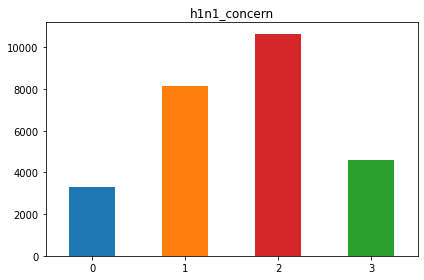

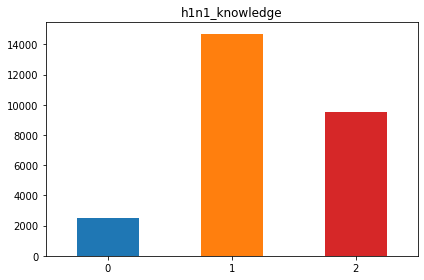

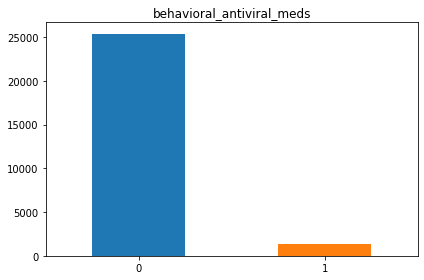

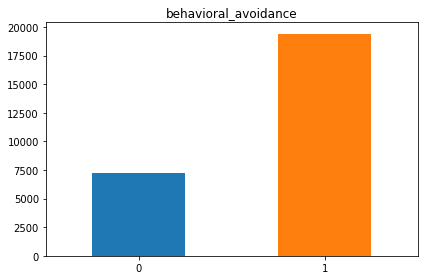

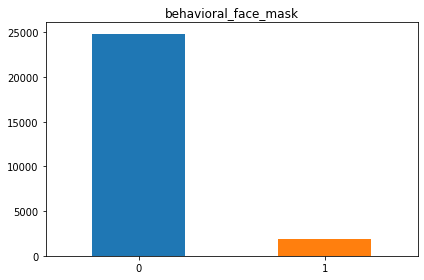

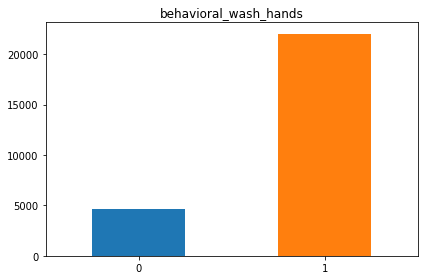

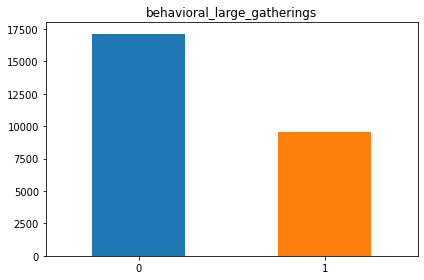

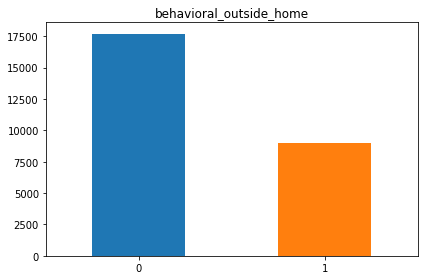

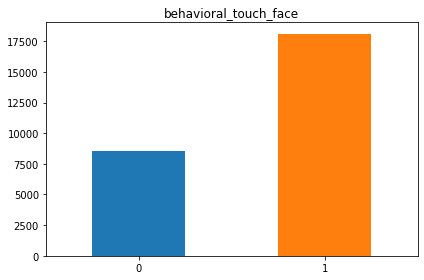

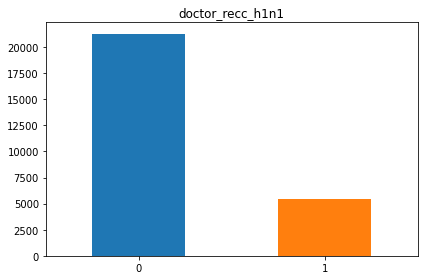

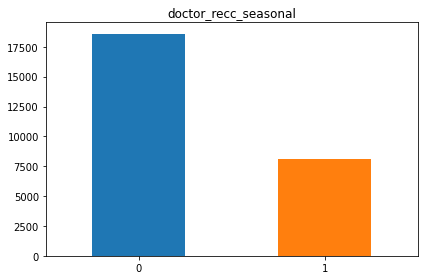

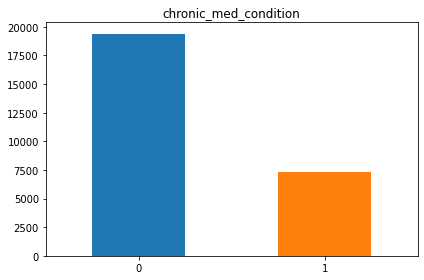

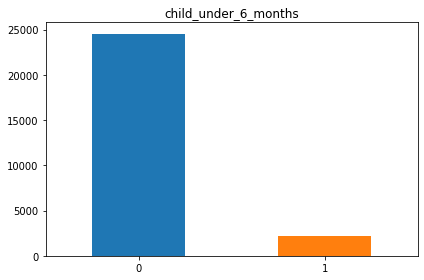

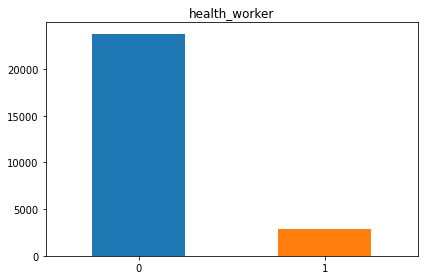

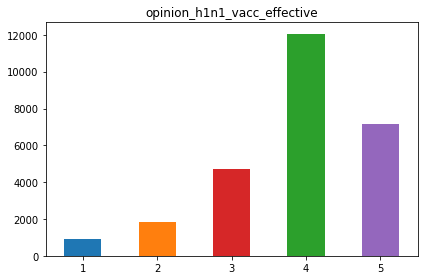

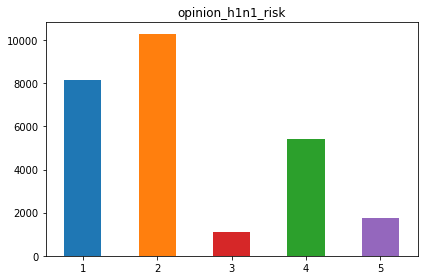

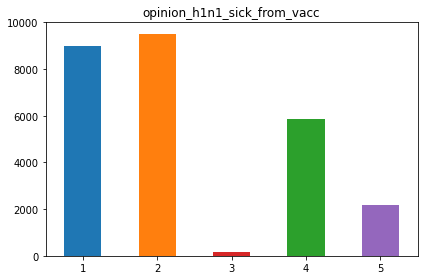

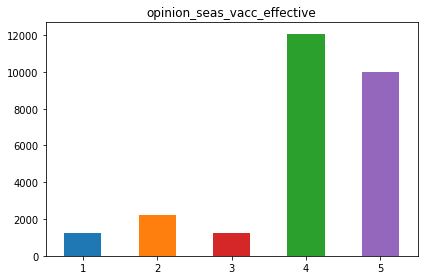

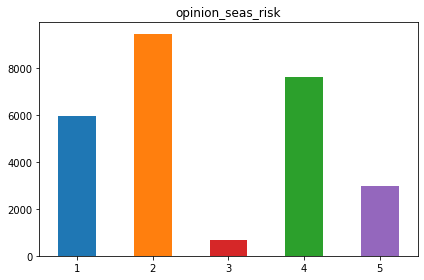

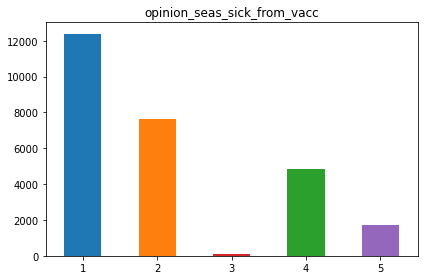

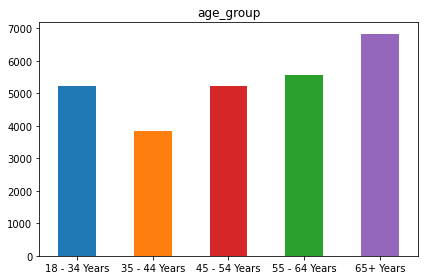

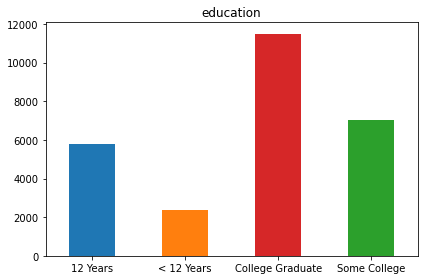

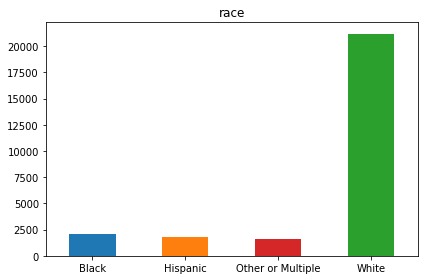

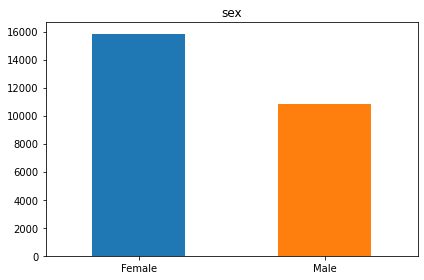

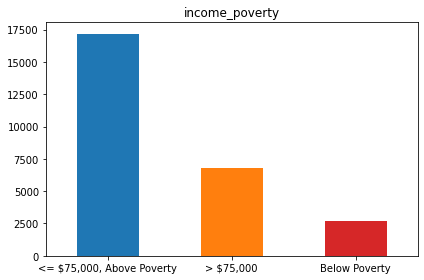

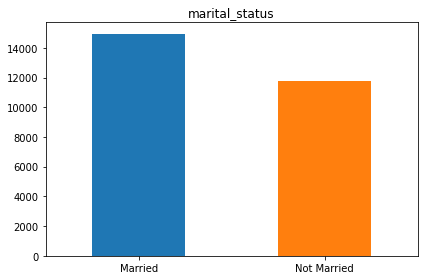

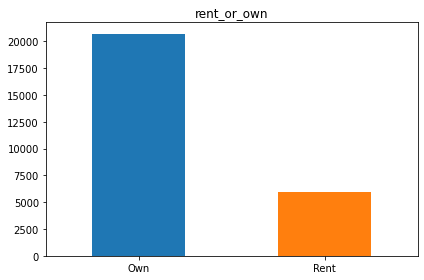

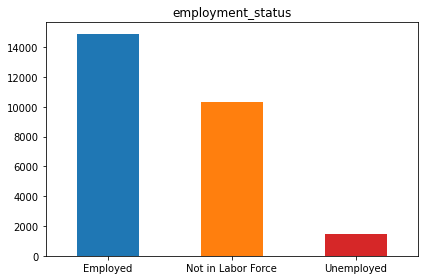

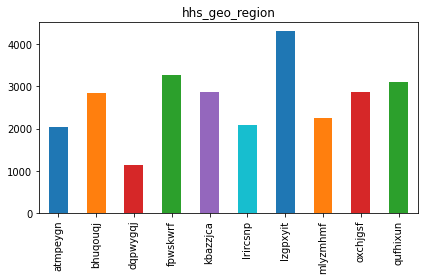

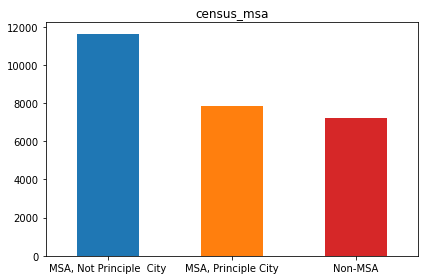

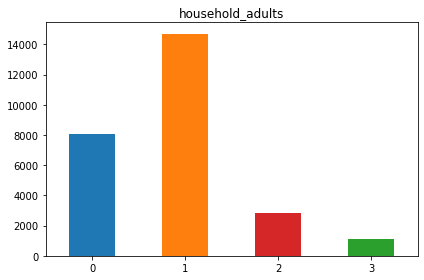

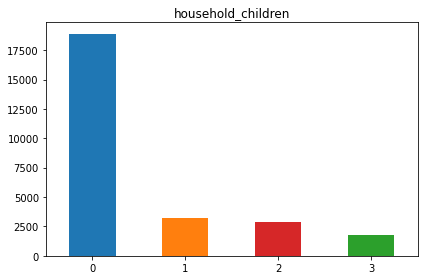

In [23]:
size_attribute=vaccines_plot.shape[1]

#The function plotSingleFeatureBarPlot plots an histogram for a single feature of a dataframe.
for i in range (1, size_attribute-2, 1):
    if(vaccines_plot.columns[i] == 'hhs_geo_region'):
        Utils.plotSingleFeatureBarPlot(vaccines_plot, vaccines_plot.columns[i],rot=90)
    else:
        Utils.plotSingleFeatureBarPlot(vaccines_plot, vaccines_plot.columns[i])

<a id='dp'></a>
### 3A. Conditional Histograms ([to top](#top))

An important part of the data exploration was the study of the variables conditional distributions. We aimed to understand how a certain feature can discriminate the target variables. 
We noticed that there exist some features where an answer strongly implies a certain target variable while there exist other variables that are not too much discriminant.

We noticed that the most interesting plots are:
- h1n1_concern
- doctor_recc_h1n1
- doctor_recc_seasonal
- chronic_med_condition
- healt_worker
- All the opinions features
- age_group

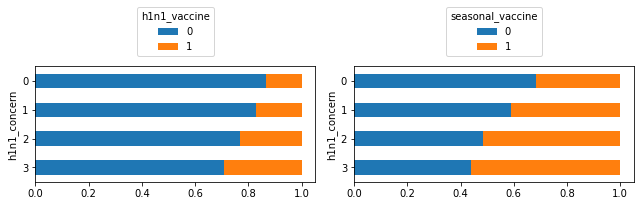

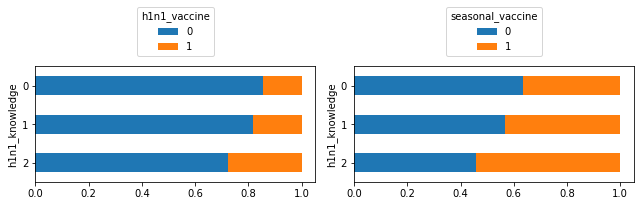

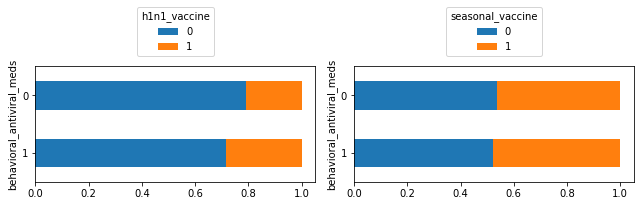

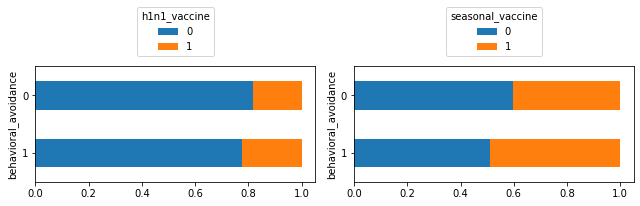

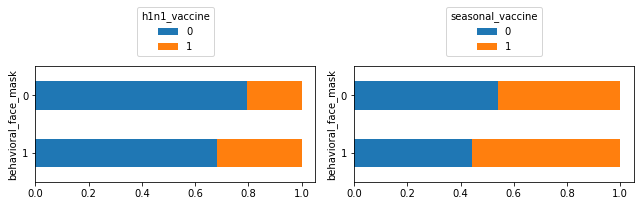

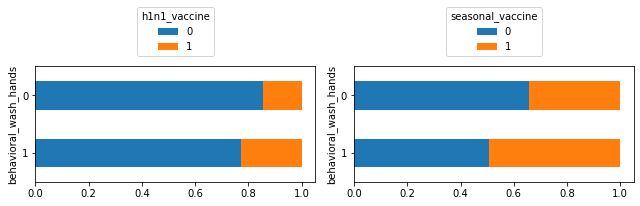

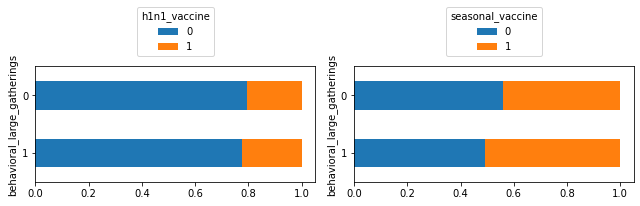

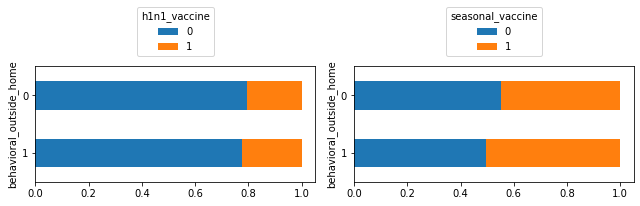

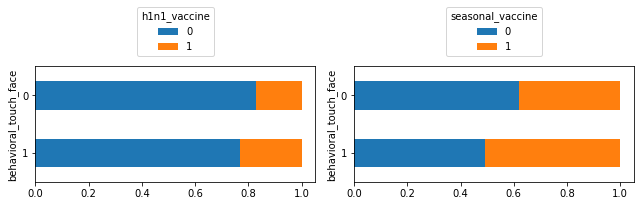

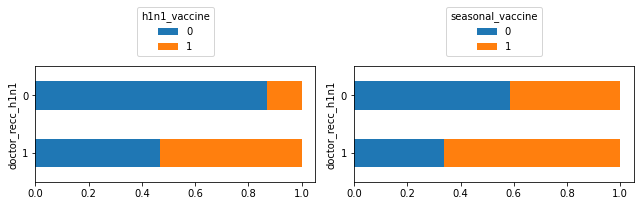

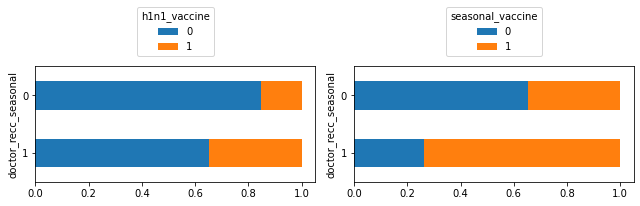

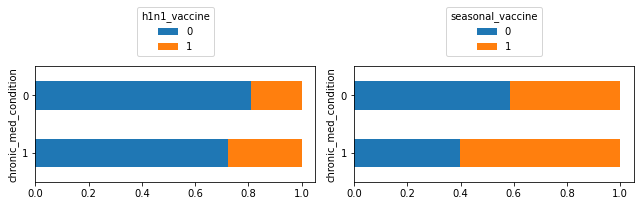

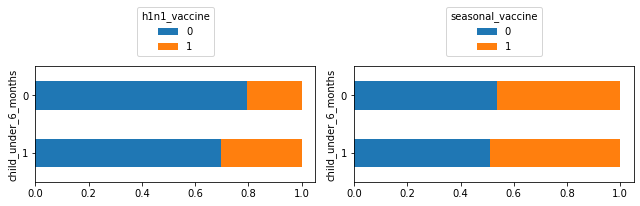

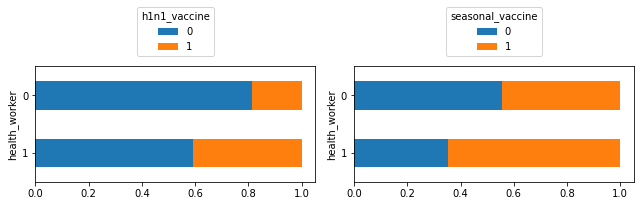

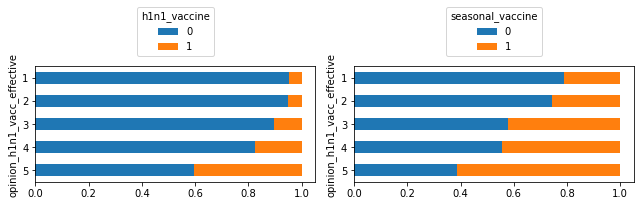

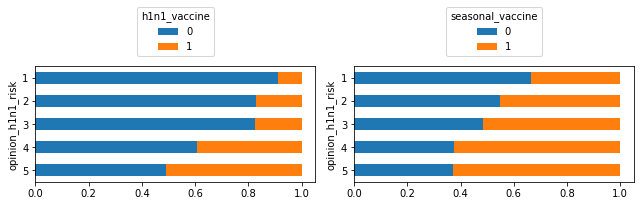

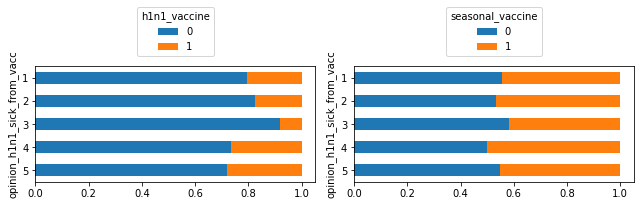

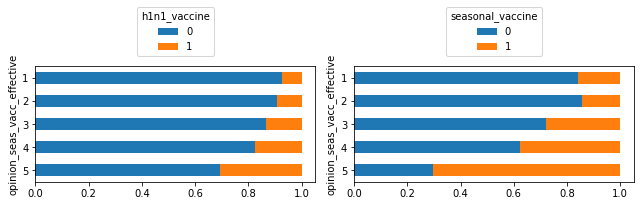

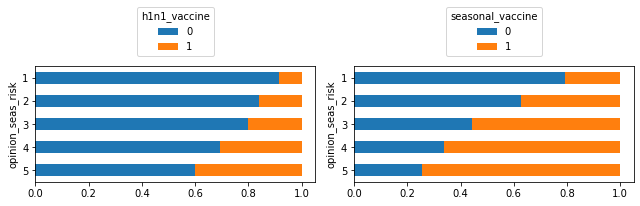

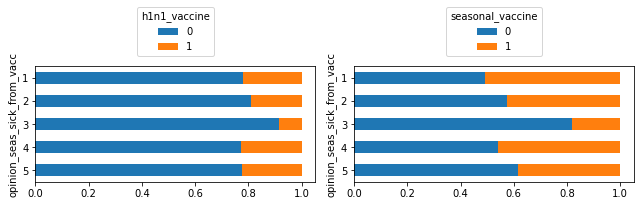

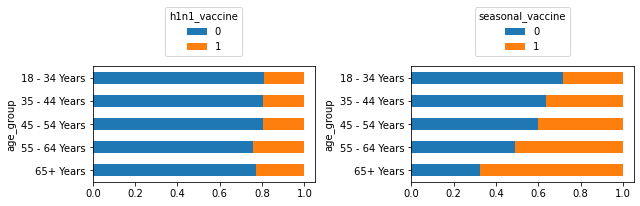

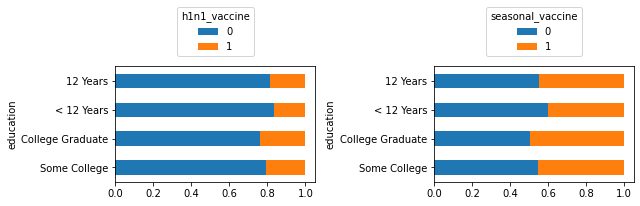

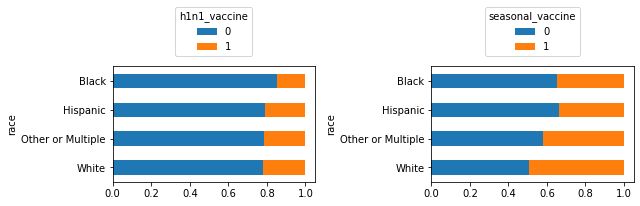

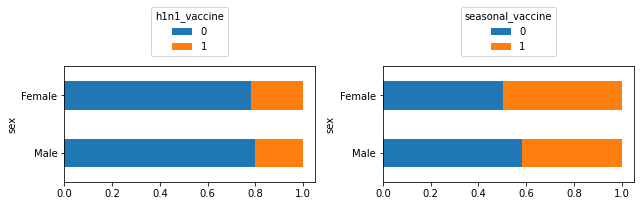

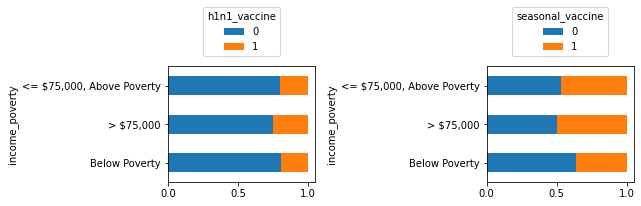

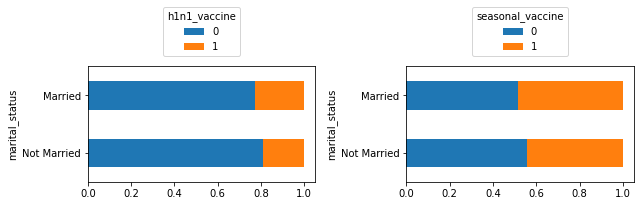

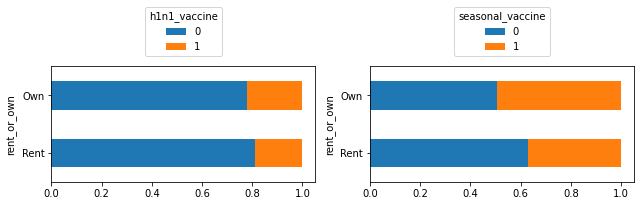

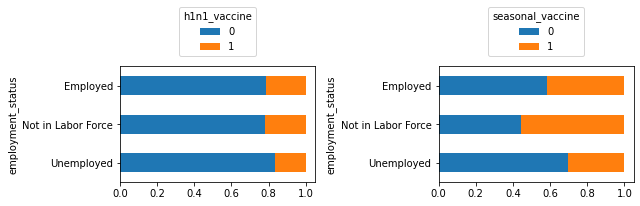

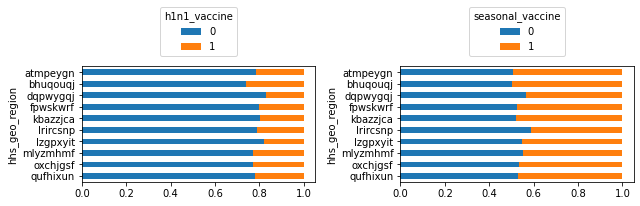

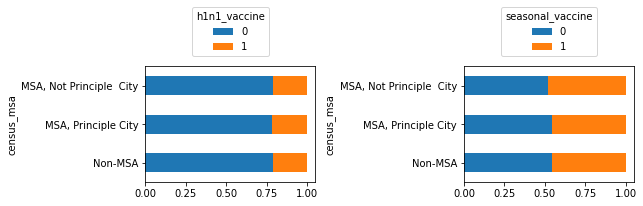

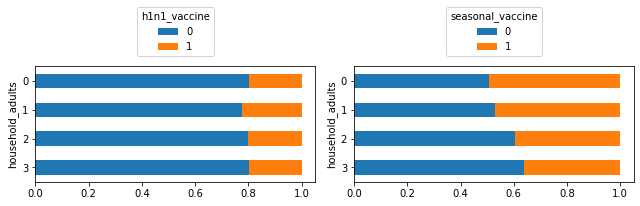

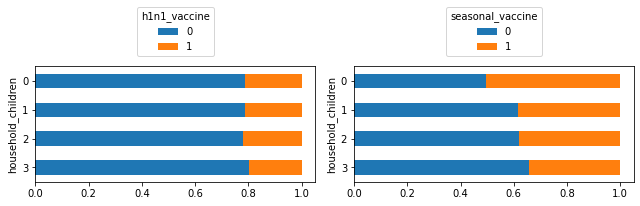

In [24]:
#The function plotConditionalHistogram_SingleImage plots a conditional histogram for a feature with respect to both target variables. 
for i in range (1, size_attribute-2, 1):
    Utils.plotConditionalHistogram_SingleImage('h1n1_vaccine', 'seasonal_vaccine', [vaccines_plot.columns[i]], vaccines_plot)

<a id='out'></a>
### 3B. Outliers ([to top](#top))

As we already explained in section [Data Consistency](#cost), for all the features in our dataset we always have only a fixed number of possible values, this allows us to state that we don't have any outlier in our dataset.

<a id='cor'></a>
### 3C. Correlations ([to top](#top))
One important aspect to explore of our dataset is the correlation between features. This analysis gives us the tools to perform the data transformation phase. We will use the Person correlation coefficient to correlate our columns.

<a id='g2'></a>
### 3CA. General ([to top](#top))
First of all we can give our attention to the correlation between non-target features. 

To graphically represent the correlation we can use a heatmap. 

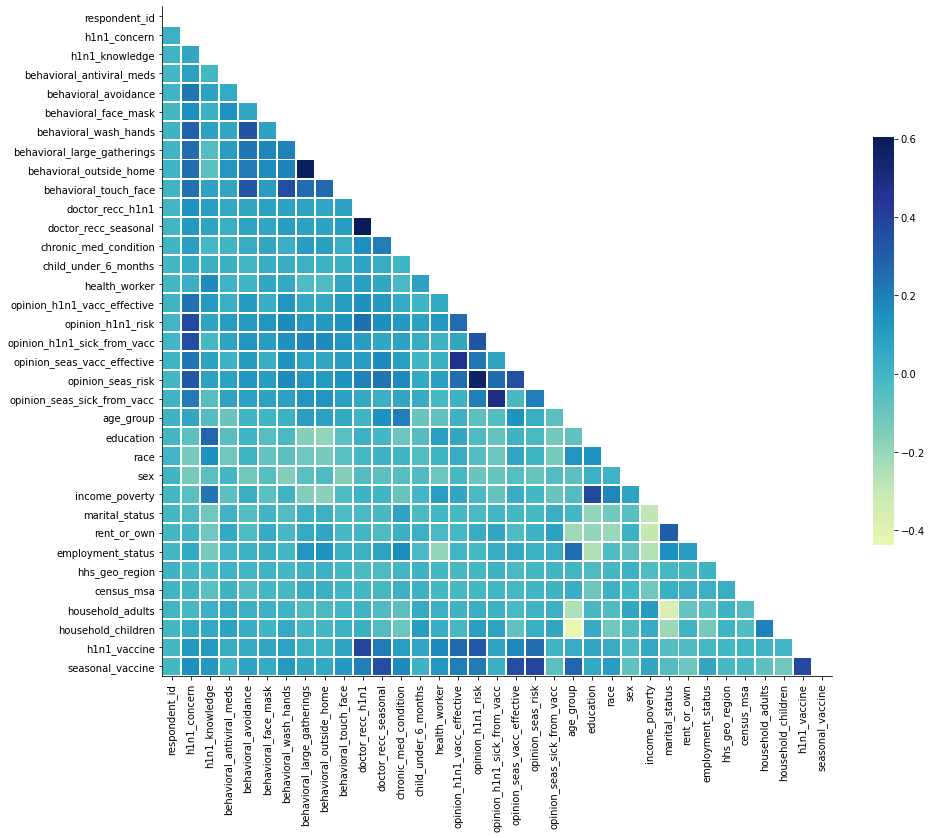

In [25]:
#The function plotHeatMapCorrelation calculate the correlation between the variables in a DataFrame and then it prints a heatmap. 
Utils.plotHeatMapCorrelation(vaccines, method = 'pearson')

If c is absolute value of the correlation between two variables we have:
- weak correlation: c >= 20
- moderate correlation: c > 30
- strong correlation: c > 40
- very strong correlation: c > 70.

Let's print the most significant correlations between variables.

In [26]:
#printPearsonCoefficentForTupleList calculate the correlation for all possible couples of features and it prints only the relevant ones.  
Utils.printPearsonCoefficentForTupleList(vaccines,features_list)

h1n1_concern - behavioral_avoidance -> Pearson coeff:  0.22964755430367892 weak correlation

h1n1_concern - behavioral_wash_hands -> Pearson coeff:  0.2916704514769062 weak correlation

h1n1_concern - behavioral_large_gatherings -> Pearson coeff:  0.25413340692083497 weak correlation

h1n1_concern - behavioral_outside_home -> Pearson coeff:  0.24540403422116253 weak correlation

h1n1_concern - behavioral_touch_face -> Pearson coeff:  0.24503789372276427 weak correlation

h1n1_concern - opinion_h1n1_vacc_effective -> Pearson coeff:  0.23584096660786785 weak correlation

h1n1_concern - opinion_h1n1_risk -> Pearson coeff:  0.37271647322242396 moderate correlation

h1n1_concern - opinion_h1n1_sick_from_vacc -> Pearson coeff:  0.3556368056498171 moderate correlation

h1n1_concern - opinion_seas_vacc_effective -> Pearson coeff:  0.2316487247260027 weak correlation

h1n1_concern - opinion_seas_risk -> Pearson coeff:  0.32798646102807494 moderate correlation

h1n1_concern - opinion_seas_sick_f

We can observe that:
- 'h1n1_concern' is weakly correlated to "behavior" and "opinion" variables.
- Except for 'behavioral_antiviral_meds' and 'behavioral_face_mask' features, all the 'behavioral' attributes show between each other some kind of correlation.
- 'opinion_h1n1_vacc_effective' is weakly related to 'opinion_h1n1_risk'.
- 'opinion_h1n1_risk' is related to 'opinion_h1n1_sick_from_vacc'.
- 'opinion_seas_vacc_effective' is weakly related to 'opinion_seas_risk'.
- 'opinion_seas_risk' is related to 'opinion_seas_sick_from_vacc'.
- The opinions regarding the same topic are correlated.
- The features regarding the social economic background of the recipient are correlated.

<a id='h2'></a>
### 3CB. H1N1 ([to top](#top))
For clarity we can analyze also the correlation between 'h1n1_vaccine' and the other features.

In [27]:
#print_ranked_correlation ranks the correlation of the variables in a DataFrame with a target feature.
correlated_list_h1n1 = Utils.print_ranked_correlation(vaccines,'h1n1_vaccine',0.10)

doctor_recc_h1n1 : 0.3940857066504833

opinion_h1n1_risk : 0.32058008032625834

opinion_h1n1_vacc_effective : 0.2673517245235416

opinion_seas_risk : 0.25587424756682203

doctor_recc_seasonal : 0.218975633506973

opinion_seas_vacc_effective : 0.17779856447251974

health_worker : 0.16805599657512743

h1n1_concern : 0.12157381283626713

h1n1_knowledge : 0.11777123540660298

----------------

chronic_med_condition : 0.09436022688543805

opinion_h1n1_sick_from_vacc : 0.07458021536021756

behavioral_wash_hands : 0.07456953724774354

behavioral_touch_face : 0.07085509948423373

behavioral_face_mask : 0.0704127339219678

child_under_6_months : 0.06671163473885339

education : 0.061738926233768456

income_poverty : 0.05291079455733677

behavioral_avoidance : 0.0468369733147415

marital_status : 0.04519365918014723

age_group : 0.041073752960843625

race : 0.04106096623035685

behavioral_antiviral_meds : 0.04022573559080508

rent_or_own : 0.03119592225354714

behavioral_outside_home : 0.0220795

For the purpose of this analysis we can remove from the list all the features related to the seasonal flu.

In [28]:
correlated_list_h1n1.remove("doctor_recc_seasonal")
correlated_list_h1n1.remove("opinion_seas_risk")
correlated_list_h1n1.remove("opinion_seas_vacc_effective")

Let's print the correlation between the variables in the list.

In [29]:
#printPearsonCoefficentForTupleList calculate the correlation for all possible couples of features and it prints only the relevant ones.  
Utils.printPearsonCoefficentForTupleList(vaccines,correlated_list_h1n1)

doctor_recc_h1n1 - opinion_h1n1_risk -> Pearson coeff:  0.24763001039254906 weak correlation

opinion_h1n1_risk - opinion_h1n1_vacc_effective -> Pearson coeff:  0.25981320743734715 weak correlation

opinion_h1n1_risk - h1n1_concern -> Pearson coeff:  0.37271647322242396 moderate correlation

opinion_h1n1_vacc_effective - h1n1_concern -> Pearson coeff:  0.23584096660786782 weak correlation



Let's print the likelihood correlation of the features with respect to 'h1n1_vaccine'.

In [30]:
#This printLu prints the correlation likelihood between a target variable and the features in a list
Utils.printLu('h1n1_vaccine',features_list, vaccines)


 correlation by h1n1_vaccine : h1n1_concern
              h1n1_vaccine
h1n1_concern              
0                 0.135619
1                 0.171348
2                 0.233336
3                 0.292093

 correlation by h1n1_vaccine : h1n1_knowledge
                h1n1_vaccine
h1n1_knowledge              
0                   0.144054
1                   0.181800
2                   0.278065

 correlation by h1n1_vaccine : behavioral_antiviral_meds
                           h1n1_vaccine
behavioral_antiviral_meds              
0                              0.208730
1                              0.285165

 correlation by h1n1_vaccine : behavioral_avoidance
                      h1n1_vaccine
behavioral_avoidance              
0                         0.181131
1                         0.224172

 correlation by h1n1_vaccine : behavioral_face_mask
                      h1n1_vaccine
behavioral_face_mask              
0                         0.204617
1                         0.3183

<a id='s2'></a>
### 3CC. Seasonal flu ([to top](#top))
For clarity we can analyze also the correlation between 'seasonal_vaccine' and the other features.

In [31]:
#print_ranked_correlation ranks the correlation of the variables in a DataFrame with a target feature.
correlated_list_seas = Utils.print_ranked_correlation(vaccines,'seasonal_vaccine',0.10)

opinion_seas_risk : 0.3869157033152004

doctor_recc_seasonal : 0.3606958875918635

opinion_seas_vacc_effective : 0.3588687852513938

age_group : 0.277454206860214

opinion_h1n1_risk : 0.2156501898645236

opinion_h1n1_vacc_effective : 0.20318687954957979

doctor_recc_h1n1 : 0.19855975292665282

chronic_med_condition : 0.16946507432357794

h1n1_concern : 0.1544882163127543

health_worker : 0.1269773969161393

behavioral_touch_face : 0.1199254965333265

h1n1_knowledge : 0.11977869647487542

behavioral_wash_hands : 0.11225436409011828

household_children : 0.1116795065795529

race : 0.10174271296767538

rent_or_own : 0.10128445126437964

----------------

sex : 0.07709072219625095

behavioral_avoidance : 0.07613022488118479

household_adults : 0.06513674917929244

income_poverty : 0.06380466303612846

behavioral_large_gatherings : 0.06372195069134594

employment_status : 0.05848280852757154

opinion_seas_sick_from_vacc : 0.057066436498309725

education : 0.05668102187090376

behavioral_out

For the purpose of this analysis we can remove from the list all the features related to the h1n1.

In [32]:
correlated_list_seas.remove("opinion_h1n1_risk")
correlated_list_seas.remove("opinion_h1n1_vacc_effective")
correlated_list_seas.remove("doctor_recc_h1n1")
correlated_list_seas.remove("h1n1_concern")
correlated_list_seas.remove("h1n1_knowledge")

Let's print the correlation between the variables in the list.

In [33]:
#printPearsonCoefficentForTupleList calculate the correlation for all possible couples of features and it prints only the relevant ones.  
Utils.printPearsonCoefficentForTupleList(vaccines,correlated_list_seas)

opinion_seas_risk - doctor_recc_seasonal -> Pearson coeff:  0.2285137162755751 weak correlation

opinion_seas_risk - opinion_seas_vacc_effective -> Pearson coeff:  0.3436356931791521 moderate correlation

doctor_recc_seasonal - chronic_med_condition -> Pearson coeff:  0.20312132439557154 weak correlation

age_group - chronic_med_condition -> Pearson coeff:  0.2052187489075036 weak correlation

age_group - household_children -> Pearson coeff:  -0.43766753440661993 strong correlation

age_group - rent_or_own -> Pearson coeff:  -0.2133900910137744 weak correlation

behavioral_touch_face - behavioral_wash_hands -> Pearson coeff:  0.36297919603445306 moderate correlation

race - rent_or_own -> Pearson coeff:  -0.20348832958255333 weak correlation



Let's print the likelihood correlation of the features with respect to 'h1n1_vaccine'.

In [34]:
#This printLu prints the correlation likelihood between a target variable and the features in a list
Utils.printLu('seasonal_vaccine',features_list, vaccines)


 correlation by seasonal_vaccine : h1n1_concern
              seasonal_vaccine
h1n1_concern                  
0                     0.316141
1                     0.409910
2                     0.513921
3                     0.559573

 correlation by seasonal_vaccine : h1n1_knowledge
                seasonal_vaccine
h1n1_knowledge                  
0                       0.366321
1                       0.432513
2                       0.543164

 correlation by seasonal_vaccine : behavioral_antiviral_meds
                           seasonal_vaccine
behavioral_antiviral_meds                  
0                                  0.464930
1                                  0.478862

 correlation by seasonal_vaccine : behavioral_avoidance
                      seasonal_vaccine
behavioral_avoidance                  
0                             0.403521
1                             0.488835

 correlation by seasonal_vaccine : behavioral_face_mask
                      seasonal_vaccine
be

<a id='tr'></a>
## 4. Data Transformation ([to top](#top))

In this part of the notebook we made some transformation to our dataset, we dropped some columns that **at the moment** we did not find interesting and we created some new variable to make our dataset simpler. Then we splitted the main dataset into two sub-datasets one for each target variable. 

We would like to emphasize that these transformations are temporary because we need to go even deeper into the classification phase to understand if they are good choices or not.

<a id='ve'></a>
### 4A. Variables Elimination ([to top](#top))

In this phase we eliminate all the variables that at the moment we believe are not foundamental for the classification task.We have chosen them analyzing the correlation results

In [35]:
cols_to_drop = [
    'respondent_id',#the id of the respondent has no meaning in the classification task.
    'h1n1_concern',
    'rent_or_own',
    'behavioral_large_gatherings',
    'respondent_id',
    'marital_status',
    'education'
]
vaccines.drop(cols_to_drop, axis=1, inplace = True)

<a id='vc'></a>
### 4B. Variables Creation ([to top](#top))

We decided to merge some of our features in a single feature because we think that these features are highly correlated among them.

More specifically we created two new features:
- FamilySize: It is the summation of household_children, household_adults and 1 (because the respondant is not counted in household_children or household_adults).
- Behavior: As we said, we believe that some of our features are highly correlated among them. All the Behavior features indicates how the respondent behaves to handle the spread of the virus and so we decided to sum them and to create a single feature.

Here we start with the creation of the FamilySize feature

In [36]:
# +1 because otherwise we don't consider the respondent 
vaccines['FamilySize'] = vaccines['household_adults'].astype(int) + vaccines['household_children'].astype(int) + 1

In [37]:
pd.set_option('display.max_columns', None)
vaccines.head()

,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,income_poverty,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,FamilySize
0,0,0,0,0,0,1,1,0,0,0,0,0,3,1,2,2,1,2,3,3,0,0,1,8,2,0,0,0,0,1
1,2,0,1,0,1,1,1,0,0,0,0,0,5,4,4,4,2,4,1,3,1,0,0,1,0,0,0,0,1,1
2,1,0,1,0,0,0,0,0,0,1,0,0,3,1,1,4,1,2,0,3,1,1,0,9,0,2,0,0,0,3
3,1,0,1,0,1,0,0,0,1,1,0,0,3,3,5,5,4,1,4,3,0,0,1,5,1,0,0,0,1,1
4,1,0,1,0,1,0,1,0,0,0,0,0,3,3,2,3,1,4,2,3,0,1,0,9,0,1,0,0,0,2


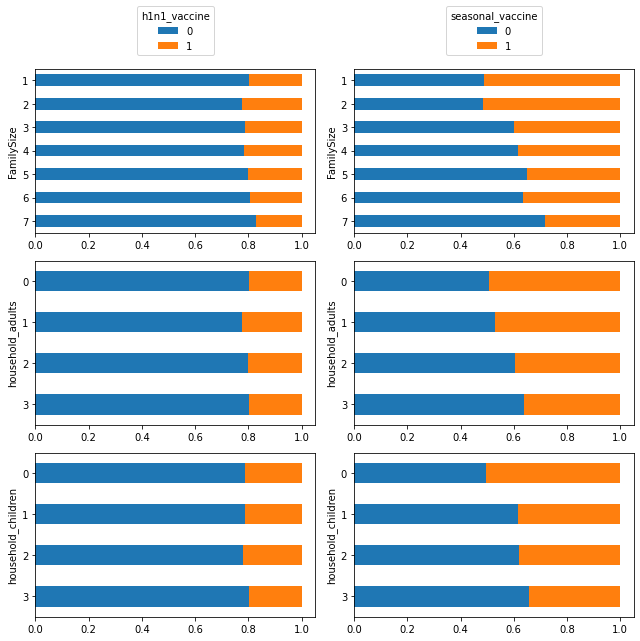

In [38]:
#The function plotConditionalHistogram_SingleImage plots a conditional histogram for a feature with respect to both target variables. 
Utils.plotConditionalHistogram_SingleImage('h1n1_vaccine', 'seasonal_vaccine', ['FamilySize', 'household_adults', 'household_children'], vaccines)

And now we can also create the behavior feature.

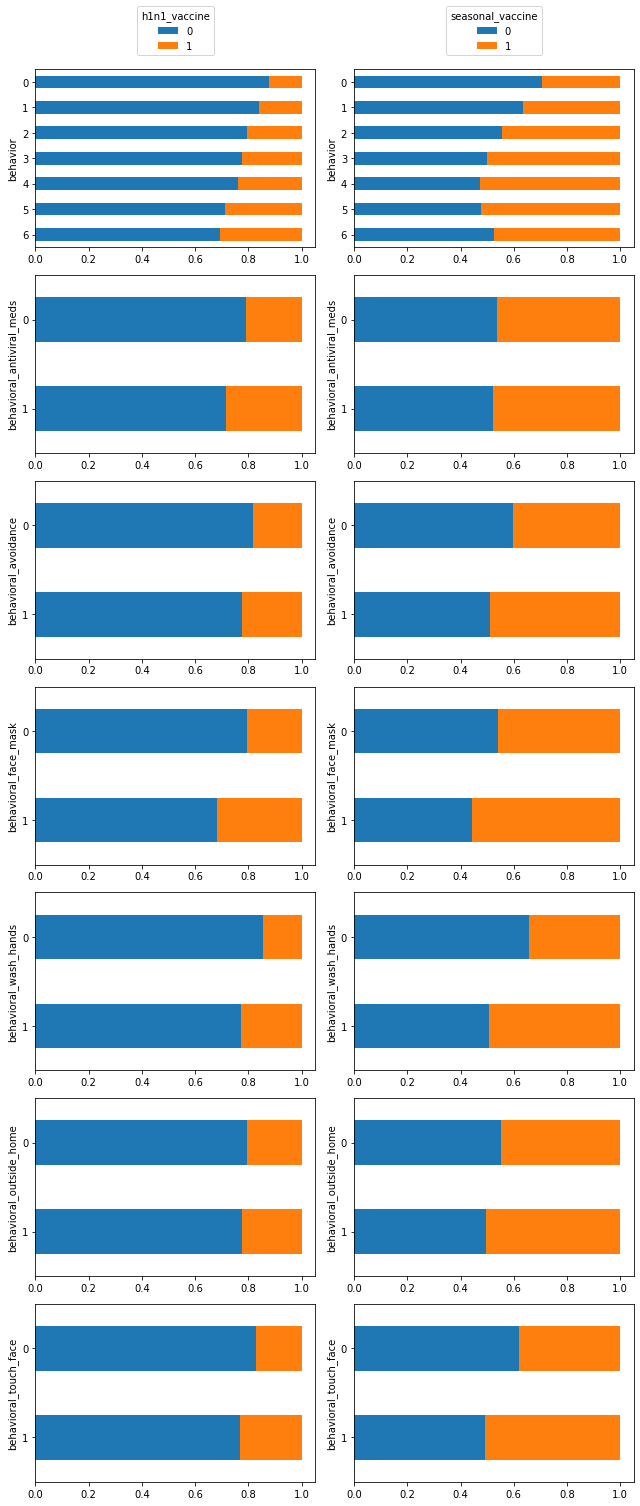

In [39]:
#The function plotConditionalHistogram_SingleImage plots a conditional histogram for a feature with respect to both target variables. 
vaccines['behavior']=vaccines['behavioral_antiviral_meds']+vaccines['behavioral_avoidance']+vaccines['behavioral_face_mask']+vaccines['behavioral_wash_hands']+vaccines['behavioral_outside_home']+vaccines['behavioral_touch_face']
Utils.plotConditionalHistogram_SingleImage('h1n1_vaccine', 'seasonal_vaccine', ['behavior','behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask','behavioral_wash_hands','behavioral_outside_home','behavioral_touch_face'], vaccines)

We produced some conditional histograms to understand if the transformation of our features could drastically change our dataset.
We noticed that the histograms of the new variables are consistent with the original conditional histograms.

We also considered creating a single variable for opinions, but the three features have a very different semantics and so we decided to keep them separated. 

In [40]:
#We need to drop the features which have been merged.
cols_to_drop = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'household_adults',
    'household_children'
]
vaccines.drop(cols_to_drop, axis=1, inplace = True)
vaccines.head()

,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,income_poverty,employment_status,hhs_geo_region,census_msa,h1n1_vaccine,seasonal_vaccine,FamilySize,behavior
0,0,0,0,0,0,0,3,1,2,2,1,2,3,3,0,0,1,8,2,0,0,1,2
1,2,0,0,0,0,0,5,4,4,4,2,4,1,3,1,0,0,1,0,0,1,1,4
2,1,0,0,1,0,0,3,1,1,4,1,2,0,3,1,1,0,9,0,0,0,3,1
3,1,0,1,1,0,0,3,3,5,5,4,1,4,3,0,0,1,5,1,0,1,1,2
4,1,0,0,0,0,0,3,3,2,3,1,4,2,3,0,1,0,9,0,0,0,2,3


<a id='split'></a>
### 4C. Splitting of the dataset ([to top](#top))
The next step of our work will be the classification task, so to help us we decided to create alongside our main dataset two sub-datasets one for each target variable. This does not means that we will use only this two new datasets during the classification task becouse we are aware that some of the variables related to h1n1 might play a role in the seasonal flu classification and vice versa. So we will discard the main dataset only after a complete and exhaustive verification during the classification phase.

In [41]:
#save vaccines in a csv file
vaccines.to_csv("./Data/vaccines.csv",index=False)

<a id='h3'></a>
### 4CA. H1N1 ([to top](#top))

Let's create the dataset relative to h1n1 vaccine. We need to discard all the features related to the seasonal flu vaccine.

In [42]:
#columns to discard
cols_to_drop = [
    'doctor_recc_seasonal',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'seasonal_vaccine'
]
h1n1=vaccines.drop(cols_to_drop, axis=1)
h1n1.head()

,h1n1_knowledge,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,income_poverty,employment_status,hhs_geo_region,census_msa,h1n1_vaccine,FamilySize,behavior
0,0,0,0,0,0,3,1,2,3,3,0,0,1,8,2,0,1,2
1,2,0,0,0,0,5,4,4,1,3,1,0,0,1,0,0,1,4
2,1,0,1,0,0,3,1,1,0,3,1,1,0,9,0,0,3,1
3,1,0,1,0,0,3,3,5,4,3,0,0,1,5,1,0,1,2
4,1,0,0,0,0,3,3,2,2,3,0,1,0,9,0,0,2,3


In [43]:
#save h1n1 in a csv file
h1n1.to_csv("./Data/h1n1.csv",index=False)

<a id='s3'></a>
### 4CB. Seasonal flu ([to top](#top))

Let's create the dataset relative to seasonal flu vaccine. We need to discard all the features related to h1n1 and the columns we belive are not usefull for the classification.

In [44]:
cols_to_drop = [
    'h1n1_knowledge',
    'doctor_recc_h1n1',
    'child_under_6_months',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'h1n1_vaccine'
]
seasonalFlu=vaccines.drop(cols_to_drop, axis=1)
seasonalFlu.head()

,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,income_poverty,employment_status,hhs_geo_region,census_msa,seasonal_vaccine,FamilySize,behavior
0,0,0,0,2,1,2,3,3,0,0,1,8,2,0,1,2
1,0,0,0,4,2,4,1,3,1,0,0,1,0,1,1,4
2,0,1,0,4,1,2,0,3,1,1,0,9,0,0,3,1
3,1,1,0,5,4,1,4,3,0,0,1,5,1,1,1,2
4,0,0,0,3,1,4,2,3,0,1,0,9,0,0,2,3


In [45]:
#save seasonalFlu in a csv file
seasonalFlu.to_csv("./Data/seasonal.csv",index=False)